In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math 
import shutil
import glob

In [3]:
#count the number of images in the respective classes
ROOT_DIR = "F:/New Dataset - Copy"
number_of_images ={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] =len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('Test', 2), ('train', 2), ('val', 2)])

In [4]:
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Dropout,Flatten, Dense, BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


In [5]:
## CNN MODEL

model = Sequential()

model.add(Conv2D(filters= 16 , kernel_size= (3,3), activation='relu', input_shape = (50,50,3) ) )
model.add(Conv2D(filters= 36 , kernel_size=(3,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters= 64 , kernel_size=(3,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64 , activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1,activation= 'sigmoid'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 36)        5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [7]:
model.compile(optimizer= 'adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [8]:
from keras.callbacks import ModelCheckpoint

mc= ModelCheckpoint(monitor="val_accuracy",filepath="./apsaramodel.h5", verbose= 1 , save_best_only= True , mode= 'auto' )

cd= [mc]

In [9]:
def preprocessingImages1(path):
#input :: path
#output : pre processed images'''

  image_data =ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(50,50),batch_size=16,class_mode='binary')
  return image

In [10]:
path="F:\\New Dataset - Copy\\train"
train_data = preprocessingImages1(path)

Found 4900 images belonging to 2 classes.


In [11]:
def preprocessingImages2(path):
#input :: path
#output : pre processed images'''

  image_data =ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(50,50),batch_size=16,class_mode='binary')
  return image

In [12]:
path="F:\\New Dataset - Copy\\Test"
test_data=preprocessingImages2(path)

Found 1050 images belonging to 2 classes.


In [13]:
path="F:\\New Dataset - Copy\\val"
val_data=preprocessingImages2(path)

Found 1050 images belonging to 2 classes.


In [14]:
hs = model.fit(train_data,
                steps_per_epoch=8 ,
                 epochs=100 ,
                  verbose= 1,
                    validation_data= val_data,
                        validation_steps= 16 ,
                         callbacks= cd)

Epoch 1/100
8/8 [==============================] - 51s 6s/step - loss: 0.7122 - accuracy: 0.5156 - val_loss: 0.6898 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to .\apsaramodel.h5
Epoch 2/100
8/8 [==============================] - 48s 6s/step - loss: 0.6877 - accuracy: 0.5781 - val_loss: 0.6819 - val_accuracy: 0.4922

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/100
8/8 [==============================] - 50s 7s/step - loss: 0.6777 - accuracy: 0.5703 - val_loss: 0.6630 - val_accuracy: 0.7773

Epoch 00003: val_accuracy improved from 0.50000 to 0.77734, saving model to .\apsaramodel.h5
Epoch 4/100
8/8 [==============================] - 48s 6s/step - loss: 0.6731 - accuracy: 0.6121 - val_loss: 0.6400 - val_accuracy: 0.7617

Epoch 00004: val_accuracy did not improve from 0.77734
Epoch 5/100
8/8 [==============================] - 58s 8s/step - loss: 0.6534 - accuracy: 0.6328 - val_loss: 0.5959 - val_accuracy: 0.7383

Epoch 0

In [15]:
h = hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

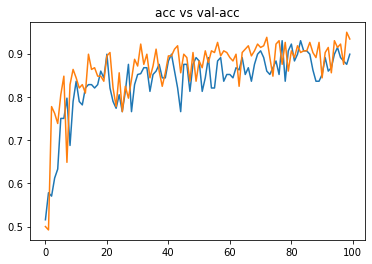

In [16]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()

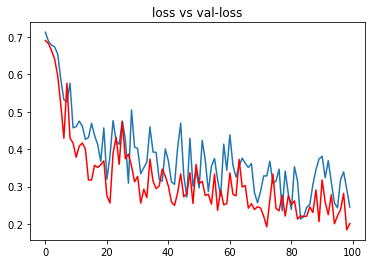

In [17]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")

plt.title("loss vs val-loss")
plt.show()

In [18]:
  # model accuracy

from keras.models import load_model

model = load_model("C:\\Users\\yuvra\\pyton project\\Untitled Folder\\apsaramodel.h5")

In [19]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of our model is {acc*100} % ")

the accuracy of our model is 89.14285898208618 % 


In [20]:
from keras.preprocessing.image import load_img, img_to_array

In [21]:
path="F:\\New Dataset - Copy\\val\\TB\\CHNCXR_0379_1.png"

img = load_img(path, target_size = (50,50))
input_arr = img_to_array(img)/255

input_arr.shape


(50, 50, 3)

In [22]:
input_arr = np.expand_dims(input_arr, axis= 0 )

In [23]:
pred1=(model.predict(input_arr))
a= 1-pred1

if (a<pred1):
  print("the image is infected")
else:
  print("the image is healthy")

the image is infected


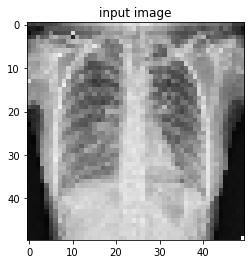

In [24]:
  # to display image

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


In [25]:
print (pred1)
print("pred is ",pred1)
a= 1-pred1

if (a<pred1):
  print("the image is infected")
else:
  print("the image is healthy")

[[0.8644798]]
pred is  [[0.8644798]]
the image is infected


In [26]:
os.chdir("F:\\New Dataset - Copy\\Test\\TB\\")

In [27]:
arr=[]
path1=os.listdir()
path1=(path1)
l=len(path1)
print(path1[2])


CHNCXR_0336_1 - Copy.png


In [29]:
for i in range(0,l):
    path="F:\\New Dataset - Copy\\Test\\TB\\"+path1[i]

    img = load_img(path, target_size = (50,50))
    input_arr = img_to_array(img)/255

    input_arr.shape
    input_arr = np.expand_dims(input_arr, axis= 0 )
    
    pred1=(model.predict(input_arr))
    a= 1-pred1

    if (a<pred1):
      print("Infected")
    else:
      print("Healthy")

    i+1

Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Infected
Infected
Infected
Infected
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
I

In [30]:
os.chdir("F:\\New Dataset - Copy\\Test\\Normal\\")

In [31]:
arr=[]
path1=os.listdir()
path1=(path1)
l=len(path1)
print(path1[2])


Normal-1010.png


In [33]:
for i in range(0,l):
    path="F:\\New Dataset - Copy\\Test\\Normal\\"+path1[i]

    img = load_img(path, target_size = (50,50))
    input_arr = img_to_array(img)/255

    input_arr.shape
    input_arr = np.expand_dims(input_arr, axis= 0 )
    
    pred1=(model.predict(input_arr))
    a= 1-pred1

    if (a<pred1):
      print("Infected")
    else:
      print("Healthy")

    i+1

Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Infected
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Infected
Healthy
Healthy
Healthy
Healthy
Infected
Healthy
Healthy
Infected
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Infected
Healthy
Healthy
Healthy
Healthy
Healthy
Infected
Infected
H

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report

In [35]:
Model_pred=pd.read_excel("C:\\Users\\yuvra\\Documents\\100 EPOCH NEW DATASET CSV FILE.xlsx")

In [36]:
confusion_M1 = pd.crosstab(Model_pred.PREDICTION_CLASS,Model_pred.ACTUAL_CLASS)

Text(0.5, 1.0, 'Model1')

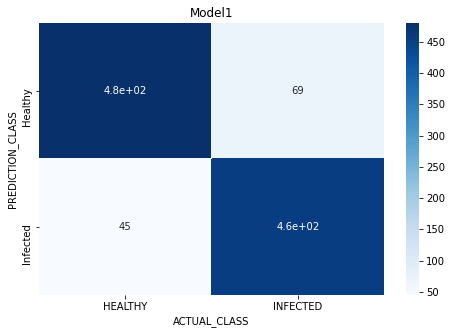

In [37]:
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sn.heatmap(confusion_M1,annot=True,cmap='Blues')
ax1.set_title("Model1")

In [38]:
for i in range(confusion_M1.shape[0]):
    TP = confusion_M1.iloc[i,i]
    FP = confusion_M1.iloc[i,:].sum()-TP
    FN = confusion_M1.iloc[:,i].sum()-TP
    TN=confusion_M1.sum().sum()-TP-FP-FN
    Accuracy =(TP+TN)/confusion_M1.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score =(2 * Precision * Recall)/(Precision+Recall)
    
    print(confusion_M1.index[i],Accuracy,Precision,Recall,F1_Score)

Healthy 0.8914285714285715 0.8743169398907104 0.9142857142857143 0.893854748603352
Infected 0.8914285714285715 0.9101796407185628 0.8685714285714285 0.888888888888889
